- nvcc
    - 有可能的路径是 `~/anaconda3/bin/nvcc`

In [2]:
from IPython.display import Image

- 注意 nvidia driver 与 cuda 是两个不同的东西
    - 先安装 dirver 再安装 cuda，两者的版本关系是：https://docs.nvidia.com/cuda/cuda-toolkit-release-notes/index.html

## 驱动问题

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

## 显卡是否在槽位（显卡有没有掉）

In [11]:
!lspci | grep -i nvidia

18:00.0 VGA compatible controller: NVIDIA Corporation Device 2684 (rev a1)
18:00.1 Audio device: NVIDIA Corporation Device 22ba (rev a1)
8a:00.0 VGA compatible controller: NVIDIA Corporation Device 2684 (rev a1)
8a:00.1 Audio device: NVIDIA Corporation Device 22ba (rev a1)


- 一共2个GPU，每个GPU都有一个相应的VGA兼容控制器和一个音频设备。
    - NVIDIA Corporation Device 2684: 4090
        - NVIDIA Corporation Device 2204: 3090
    - https://admin.pci-ids.ucw.cz//mods/PC/10de/
- 18:00.0: PCI 总线（bus）
- rev al: rev，revision，硬件的修订标识符
    - `rev ff`: 有时并不表示传统意义上的硬件版本或修订
        - 硬件故障或通信问题
        - 设备未正确安装或识别
        - 设备处于省电模式或未激活状态

In [8]:
#PCI 是一种计算机总线标准，用于连接主板上的微处理器和外围设备。
!lspci | grep -i memory

00:1f.2 Memory controller: Intel Corporation C620 Series Chipset Family Power Management Controller (rev 0a)
51:00.0 Non-Volatile memory controller: Samsung Electronics Co Ltd Device a80c


In [10]:
# 硬盘通常通过SATA或NVMe接口连接，而不是PCI。
!lshw -class disk

  *-namespace:0             
       description: NVMe disk
       physical id: 0
       logical name: hwmon0
  *-namespace:1
       description: NVMe disk
       physical id: 2
       logical name: /dev/ng0n1
  *-namespace:2
       description: NVMe disk
       physical id: 1
       bus info: nvme@0:1
       logical name: /dev/nvme0n1
       configuration: wwid=eui.0025384331418a1d


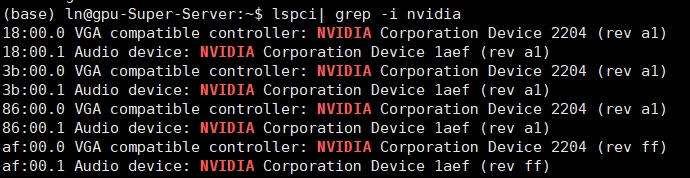

In [4]:
Image('./imgs/lspci.jpeg', width=600)

## 驱动安装的几种方式

- software update
    - `sudo systemctl disable --now unattended-upgrades`
- sudo apt install nvidia-driver-xxx
    - `ubuntu-drivers devices`
- 安装包安装：`xx.run`
    - https://www.nvidia.com/download/index.aspx#

## 命令行安装

```
$ which nvidia-detector
$ nvidia-detector
$ sudo apt install nvidia-driver-545
```

- 535 is good (stable)
    - https://ubuntuforums.org/showthread.php?t=2494826&p=14177421&highlight=

## 安装包安装

- 屏蔽开源驱动nouveau
    - `sudo vim /etc/modprobe.d/blacklist.conf`

    ```
    blacklist nouveau
    options nouveau modeset=0
    ```

- 保存再终端更新内核命令

    ```
    sudo update-initramfs -u

    sudo apt update
    sudo apt install gcc g++ make
    ```
- 重启电脑
- 先按Ctrl + Alt + F3到控制台，关闭当前图形环境
    - `sudo telinit 3`: 切换runlevel；
    
- 下载驱动：`https://www.nvidia.com/download/index.aspx#`
- `sudo chmod a+x NVIDIA-Linux-x86_64-xxx.run`
- `sudo sh NVIDIA-Linux-x86_64-xxx.run -no-opengl-files`
- 最后重新启动图形环境